# Global Power Plant Database Project

## Problem Statement:

### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database

The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    
country_long (text): longer form of the country designation
    
name (text): name or title of the power plant, generally in Romanized form
    
gppd_idnr (text): 10 or 12 character identifier for the power plant
    
capacity_mw (number): electrical generating capacity in megawatts

latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
primary_fuel (text): energy source used in primary electricity generation or export
    
other_fuel1 (text): energy source used in electricity generation or export
    
other_fuel2 (text): energy source used in electricity generation or export
    
other_fuel3 (text): energy source used in electricity generation or export
    
commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
    
owner (text): majority shareholder of the power plant, generally in Romanized form
    
source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    
url (text): web document corresponding to the source field
    
geolocation_source (text): attribution for geolocation information
    
wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    
year_of_capacity_data (number): year the capacity information was reported
    
generation_data_source (text): attribution for the reported generation information
    
generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
    
generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
    
generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
    
generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
    
generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
    
generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
    
estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
    
estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
    
estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
    
estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
    
estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
    
estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
    
estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
    
estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
    
estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
    
estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

### Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

### Prediction:

Make two prediction for labels 1) primary_fuel
2) capacity_mw

In [24]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Classification

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Importing all important libraries

In [25]:
GPPD_df = pd.read_csv("global power plant database.csv")

Here, we are uploading global power plant database csv file

In [26]:
GPPD_df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the first 5 and last 5 rows of our entire dataset. We can see that our dataset comprises of total 908 rows and 25 columns.

In our problem statement we have been asked to predict 2 labels primary_fuel and capacity_mw. When we take a look at the values present in the column primary_fuel we see that there are categorical data in that column so when we consider it as our label it will be termed as a Classification problem!

Similarly, if we take a look at the values present in the column capacity_mw we see that there are continous data in that column so when we consider it as our label it will be termed as a Regression problem!

I will choose to perform the analysis on our entire data set first then will process the information accordingly to bifurcate the inputs for a Classification model and a Regression model.

# EDA (Exploratory Data Analysis)

In [27]:
GPPD_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


Checking 1st 5 rows data in the datasets

In [28]:
GPPD_df.shape

(908, 25)

There are 908 rows and 25 columns in the datasets

In [29]:
GPPD_df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

There are 25 columns in the datasets

In [30]:
GPPD_df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There are 12 object type and remaining 13 columns float types in the datasets

In [31]:
GPPD_df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In the above cell we can see that there are missing values in many columns and few even have all the 908 rows empty that will need to be removed since it provides no insights.

Column names that have more than 50% (more than 454 rows) of missing data and will need to be deleted are:

other_fuel1

other_fuel2

other_fuel3

owner

wepp_id

generation_gwh_2013

generation_gwh_2014

generation_gwh_2015

generation_gwh_2016

generation_gwh_2017

generation_data_source

estimated_generation_gwh

In [32]:
GPPD_df = GPPD_df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
        "generation_data_source", "estimated_generation_gwh"], axis=1)

Have dropped all the column that had more than 50% of missing data since it made no sense to treat such a huge chunk of missing value and ultimately make our model biased towards those missing value treated data.

In [38]:
GPPD_df.shape

(908, 13)

Now our column numbers have been reduced to 13 from the initial value of 25.

In [39]:
GPPD_df.nunique().to_frame("Unique Values")

,Unique Values
country,1
country_long,1
name,908
gppd_idnr,908
capacity_mw,365
latitude,837
longitude,828
primary_fuel,8
commissioning_year,73
source,191


With the help of nunique method we were able to check the unique data information present in our dataset columns.

Now observing the columns "country" and "country_long" we can see that it only has 1 unique data filled in all 908 rows and does not provide any insight so it can be deleted.

Similarly, the column "year_of_capacity_data" also has 1 single value present in it's rows and has missing data as well so it will not provide any useful information and can be deleted.

Also I see that columns "name" and "gppd_idnr" have all unique data in all the 908 rows of the dataset and being a unique identifier would help building a machine learning model either and can be deleted too.

Finally, I see that there is a column "url" which basically holds web document links and values such as those or descriptions do not really help in machine learning models and we will be deleteing it too.

Jotting down the names of columns that we will need to remove are:

country

country_long

year_of_capacity_data

name

gppd_idnr

url

In [40]:
GPPD_df = GPPD_df.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1)

We have successfully dropped 6 more columns that were not providing any useful insight for our predition models.

In [41]:
print(GPPD_df.shape)
GPPD_df.head()

(908, 7)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


Now our new dataset has 908 rows and 7 columns after we got rid of all the useless columns post analysis from it's original number of 25.

In [42]:
GPPD_df.isnull().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

Okay so we still have missing values present in our dataset columns that will need to be treated now. But before that we will separate our categorical columns and numerical columns so that application of meand and mode will become easier.

In [43]:
GPPD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         908 non-null    float64
 1   latitude            862 non-null    float64
 2   longitude           862 non-null    float64
 3   primary_fuel        908 non-null    object 
 4   commissioning_year  528 non-null    float64
 5   source              908 non-null    object 
 6   geolocation_source  889 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.8+ KB


Using the info method we can see that out of the 7 columns present in our filtered dataset we have 4 numerical data valued columns and 3 object data valued columns.

In [44]:
GPPD_df.describe()

,capacity_mw,latitude,longitude,commissioning_year
count,908.000000,862.000000,862.000000,528.000000
mean,321.046378,21.196189,77.447848,1996.876894
std,580.221767,6.248627,4.907260,17.047817
min,0.000000,8.168900,68.644700,1927.000000
25%,16.837500,16.771575,74.258975,1988.000000
50%,60.000000,21.778300,76.719250,2000.000000
75%,388.125000,25.516375,79.441475,2011.250000
max,4760.000000,34.649000,95.408000,2018.000000


In [45]:
# getting list of object data type column names
object_datatype = []
for x in GPPD_df.dtypes.index:
    if GPPD_df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in GPPD_df.dtypes.index:
    if GPPD_df.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype)

Object Data Type Columns are:  ['primary_fuel', 'source', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


We have successfully bifurcated the object datatype column names and float data type column names. Since we do not have to worry about outliers and skewness in categorical columns we can use this separated column names to pre process only on numerical continous columns.

In [46]:
# filling missing data for continous values with mean
GPPD_df["latitude"].fillna(GPPD_df["latitude"].mean(),inplace=True)
GPPD_df["longitude"].fillna(GPPD_df["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
GPPD_df["commissioning_year"].fillna(GPPD_df["commissioning_year"].mode()[0],inplace=True)
GPPD_df["geolocation_source"].fillna(GPPD_df["geolocation_source"].mode()[0],inplace=True)

Since we had to take care of the missing data I have chosen to fill the null values in continous data column with it's mean and the null values for categorical data column with it's mode information.

In [47]:
GPPD_df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

Awesome we have now successfully taken care of all the missing data present in our dataset.

In [48]:
for col in object_datatype:
    print(col)
    print(GPPD_df[col].value_counts())
    print("="*120)

primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                        520
CDM                                                  124
Lancosola                                             10
National Renewable Energy Laboratory                   8
National Thermal Power Corporation (NTPC)              6
                                                    ... 
National And paper                                     1
Powers Private                                         1
Urja India edEnewables                                 1
Raajratna Energy Holdings Private Limited (REHPL)      1
ACME Cleantech Solutions Private Limited               1
Name: source, Length: 191, dtype: int64
geolocation_source
WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geo

In the above cell I am taking a look at the object data type columns so as to check how many categories each of them hold and how many values/rows are populated with that data.

# Visualization of the dataset

In [49]:
GPPD_df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source'],
      dtype='object')

Listing down the names of all the columns present in our filtered dataframe. We will analyze each one of them with the help of some visual plots.

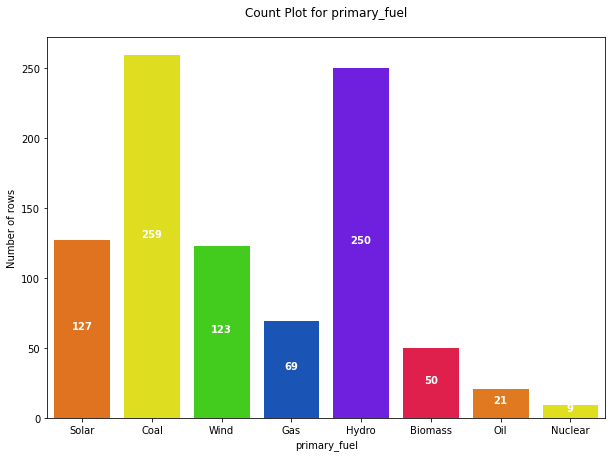

In [50]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = GPPD_df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

In the above count plot for "primary_fuel" column we can see that the highest number of values have been covered by coal and hydro fuel types then comes solar and wind. Finally we see that gas, biomass, oil and nuclear have very low data counts.

However when we will be considering "primary_fuel" as our target label then this is impose a class imbalance issue while trying to create a classification model and therefore will need to be treated accordingly.

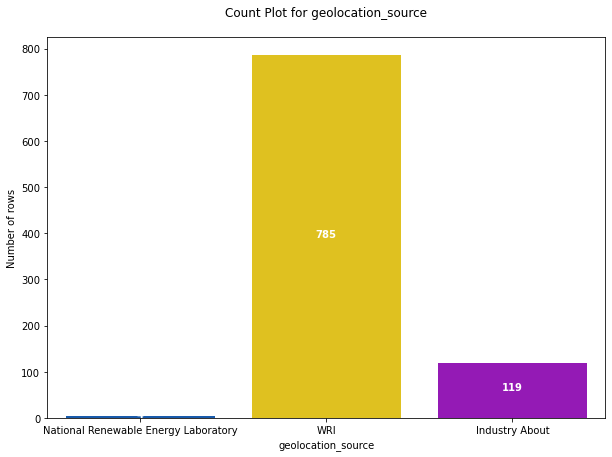

In [51]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'geolocation_source'
    values = GPPD_df[col_name].value_counts()
    index = 0
    ax = sns.countplot(GPPD_df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

In the above count plot for "geolocation_source" column we see that the highest data value is covered by WRI option and the least value which seems quite negligible has been accumulated by National Renewable Energy Laboratory.

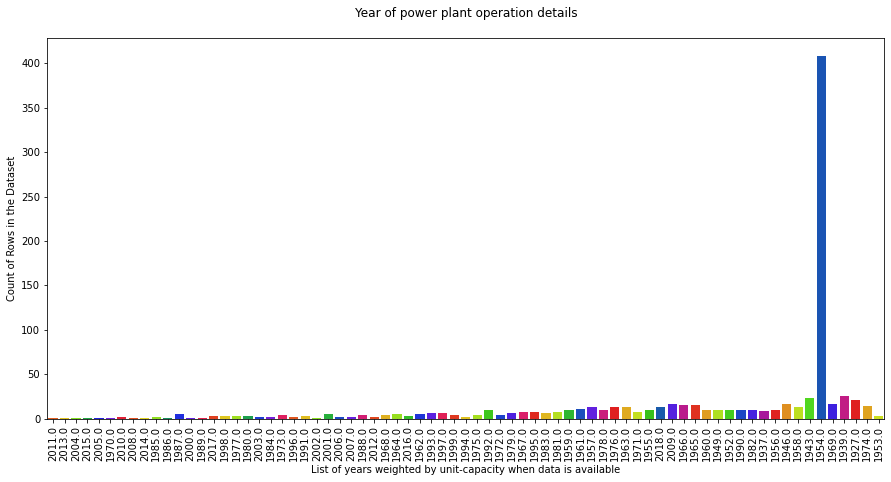

In [52]:
plt.figure(figsize=(15,7))
values = list(GPPD_df['commissioning_year'].unique())
diag = sns.countplot(GPPD_df["commissioning_year"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

In the above count plot we can see the list of years as to when the power plant data was made available. Since we had missing values in the "commissioning_year" column we replaced it with the mode wherein the year 1954 covered the most rows in our dataset compared to all the other years.

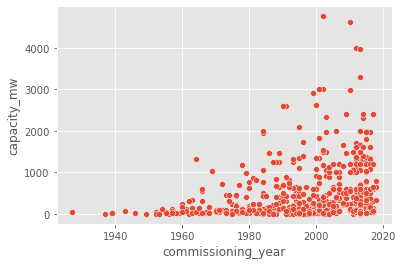

In [53]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = GPPD_df)
plt.show()

In the above scatter plot we can see that the electricity generating capacity measured in mega watts was pretty low in the olden times as compared to recent years due to the invention of efficient fuel types used for power generation.

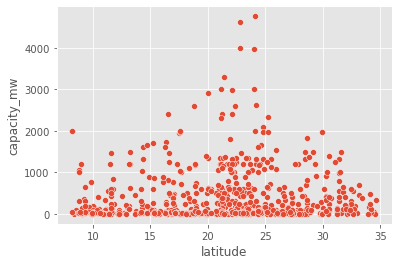

In [54]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = GPPD_df)
plt.show()

In the above scatter plot we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.

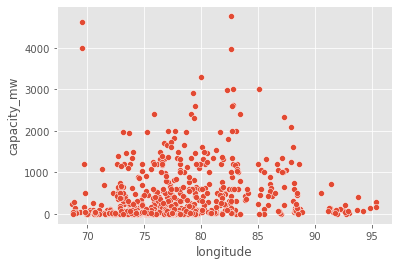

In [55]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = GPPD_df)
plt.show()


In the above scatter plot we can see that the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees.

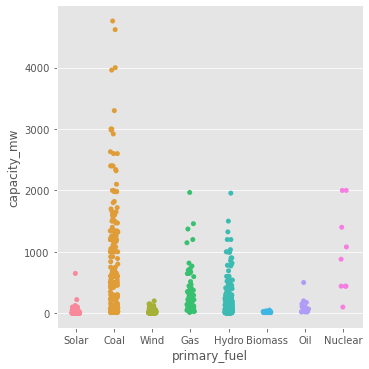

In [56]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = GPPD_df)
plt.show()

In the above categorical plot we can see that coal is the highest contender when it comes to generating electricity and biomass is used the least.

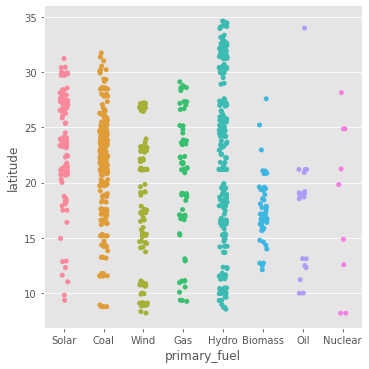

In [57]:
sns.catplot(x = "primary_fuel", y = "latitude", data = GPPD_df)
plt.show()

In the above categorical plot we can see that hydro fuel type is distributed across all the latitude values considering the water bodies that help in generating electricity at a power plant.

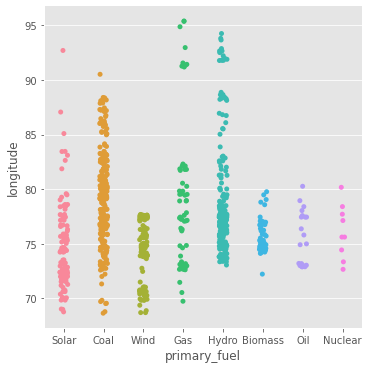

In [58]:
sns.catplot(x = "primary_fuel", y = "longitude", data = GPPD_df)
plt.show()

In the above categorical plot we can see that longitude wise decimal degress have quite a splitting data between coal and hydro considering the land lock areas rely on coal for electricity generation and costal area rely mostly on the hydro fuel type. Then we have fuel types solar and wind that are quite comprising when targeted across the longitude values.

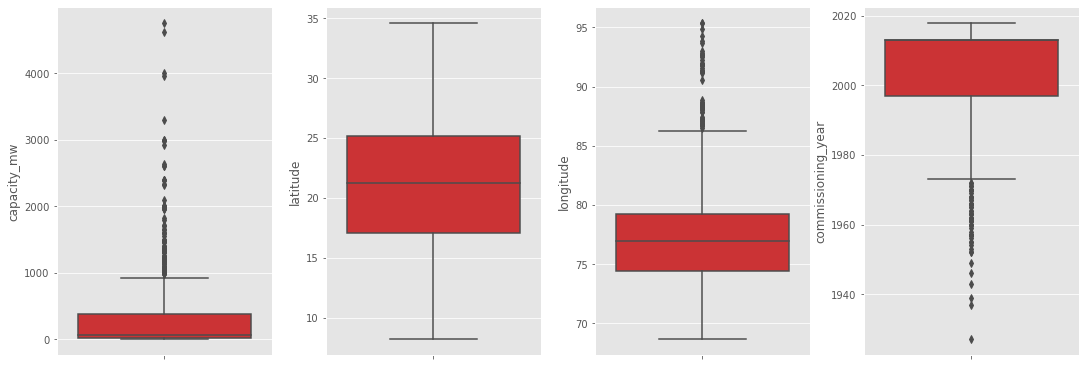

In [59]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in GPPD_df[float_datatype].items():
    sns.boxplot(y=col, data=GPPD_df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In the above box plot we can see presence of outliers in our numerical columns that will need to be checked before we start building any machine learning model.

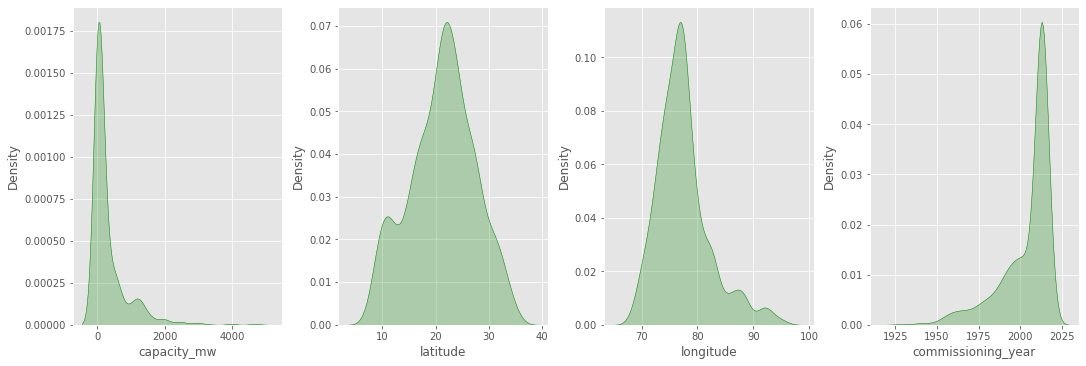

In [60]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in GPPD_df[float_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In the above distribution plot created for our numerical data columns we see skewness and that will need to be treated before we can proceed with our model building process.

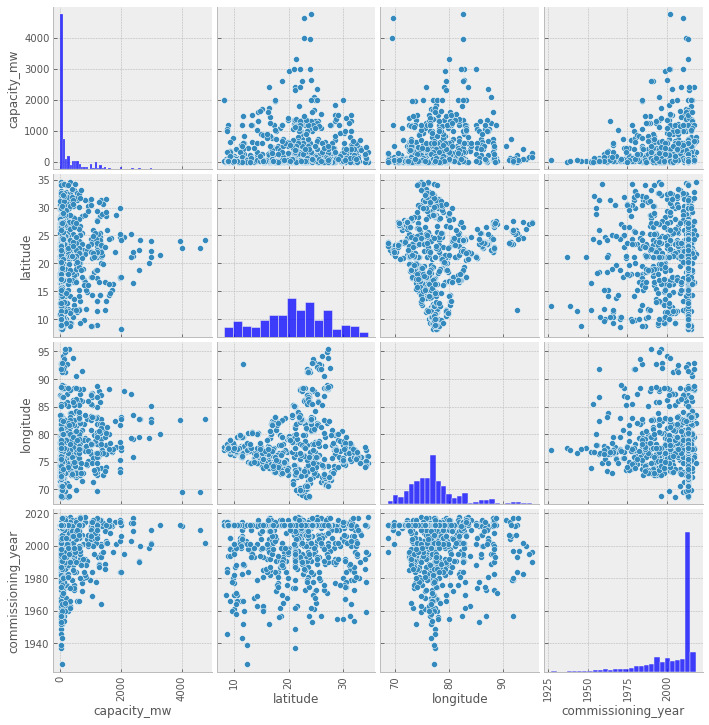

In [61]:
plt.style.use('bmh')
g = sns.pairplot(GPPD_df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()


From the above pair plot we can see the data distribution amongst the numerical data type columns.

# Encoding all the object datatype columns

In [62]:
# Label Encoder

le = LabelEncoder()
GPPD_df["primary_fuel"] = le.fit_transform(GPPD_df["primary_fuel"])
GPPD_df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,1,2013.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,7,2013.0,CDM,WRI
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI


I am using Label Encoder on our target column "primary_fuel" since we want our labels to be converted from the object datatype to numerical datatype.

In [64]:
# Ordinal Encoder

oe = OrdinalEncoder()
GPPD_df['geolocation_source'] = oe.fit_transform(GPPD_df['geolocation_source'].values.reshape(-1,1))
GPPD_df['source'] = oe.fit_transform(GPPD_df['source'].values.reshape(-1,1))
GPPD_df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2013.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2013.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


I am using the Ordinal Encoder to convert all the categorical feature columns from object datatype to numerical datatype. I could have used one hot encoding but considering that "source" column has lots of unique values the number of columns would have increased a lot so I felt ordinal encoding was a better option here.

# Correlation using a Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

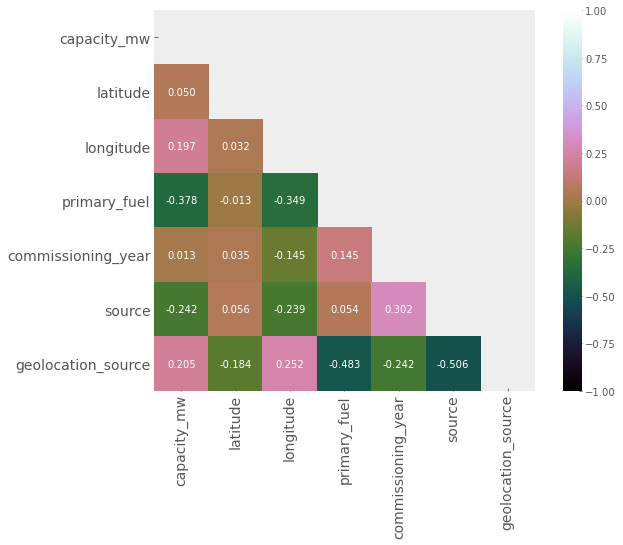

In [65]:
upper_triangle = np.triu(GPPD_df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(GPPD_df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

n the above heatmap we can see that our target labels "capacity_mw" and "primary_fuel" has both positive and negative correlations with the remaining feature columns. Also we see very less or negligible amount of multi colinearity so we will not have to worry about it. Since the one's which are reflecting the value are inter dependent on those feature columns and I intend to retain and keep them.

# Correlation Bar Plot comparing features with our labels

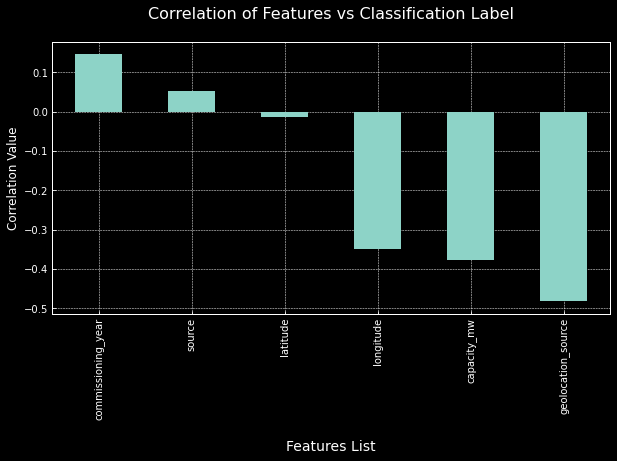

In [66]:
plt.style.use('dark_background')
GPPD_df_corr = GPPD_df.corr()
plt.figure(figsize=(10,5))
GPPD_df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

When we consider our classification label "primary_fuel" then we can see the remaining columns that are the features have 2 of them with positive correlation and 4 of them with neagtive correlation.

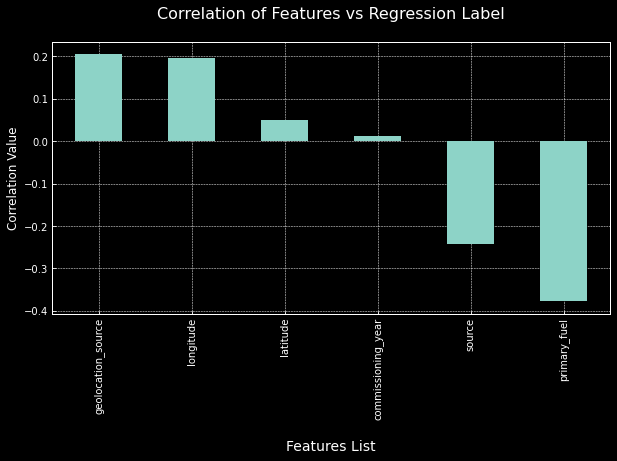

In [67]:
GPPD_df_corr = GPPD_df.corr()
plt.figure(figsize=(10,5))
GPPD_df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

When we consider our regression label "capacity_mw" then we can see the remaining columns that are the features have 4 of them with positive correlation and 2 of them with neagtive correlation.

# Using Z Score to remove outliers

In [68]:
z = np.abs(zscore(GPPD_df))
threshold = 3
GPPD_df1 = GPPD_df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", GPPD_df.shape)
print ("Shape of the dataframe after removing outliers: ", GPPD_df1.shape)
print ("Percentage of data loss post outlier removal: ", (GPPD_df.shape[0]-GPPD_df1.shape[0])/GPPD_df.shape[0]*100)

GPPD_df=GPPD_df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (908, 7)
Shape of the dataframe after removing outliers:  (839, 7)
Percentage of data loss post outlier removal:  7.599118942731277


I have used the Z score method to remove the outliers since the IQR method was making me lose way more than 10 percent of data which I could not have afforded to lose.

In [69]:
GPPD_df.skew()

capacity_mw           1.964097
latitude             -0.109264
longitude             0.846704
primary_fuel          0.419942
commissioning_year   -1.578180
source                1.794155
geolocation_source   -2.114267
dtype: float64

The skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 skewness value.

# Using Log Transform to fix skewness

In [70]:
for col in float_datatype:
    if GPPD_df.skew().loc[col]>0.55:
        GPPD_df[col]=np.log1p(GPPD_df[col])

I have applied Log Transformation on our numerical float datatype columns to ensure that we do not have skewness in our dataset.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and classification label

In [71]:
X = GPPD_df.drop('primary_fuel', axis=1)
Y = GPPD_df['primary_fuel']


I have bifurcated the dataset into features and classification label where X represents all the feature columns and Y represents the classification target label column.

# Resolving the class imbalance issue in our label column

In [72]:
Y.value_counts()

1    237
3    219
7    123
6    121
2     64
0     45
5     21
4      9
Name: primary_fuel, dtype: int64

Listing the values of our classification label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [73]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [74]:
Y.value_counts()

0    237
1    237
2    237
3    237
4    237
5    237
6    237
7    237
Name: primary_fuel, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the classification machine learning model does not get biased towards one category.

# Feature Scaling

In [75]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.765820,1.431284,-0.863668,0.519212,1.423683,-1.197585
1,0.163419,0.829951,-0.465516,0.691059,2.906282,0.369154
2,-0.356793,0.326288,-2.030035,0.691059,-0.583528,0.369154
3,0.346703,0.672456,3.897366,-0.082251,-0.560719,0.369154
4,1.837889,0.336229,1.674975,0.862906,-0.560719,0.369154


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding best random state for building Classification Models

In [76]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 72.9957805907173 on Random State 10


Great so with the help of random state selection process we have found our lucky number to be 45 amongst 1-500 range.

# Machine Learning Model for Classification with Evaluation Metrics

In [77]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [78]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80        60
           1       0.58      0.53      0.55        55
           2       0.40      0.27      0.32        44
           3       0.63      0.58      0.60        71
           4       0.73      0.92      0.81        72
           5       0.51      0.35      0.42        60
           6       1.00      1.00      1.00        59
           7       0.82      1.00      0.90        53

    accuracy                           0.70       474
   macro avg       0.67      0.69      0.68       474
weighted avg       0.68      0.70      0.69       474

Accuracy Score: 70.46413502109705
Cross Validation Score: 67.24677128176643

Accuracy Score - Cross Validation Score is 3.2173637393306223


In [79]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        60
           1       0.67      0.55      0.60        55
           2       0.69      0.45      0.55        44
           3       0.86      0.68      0.76        71
           4       0.74      1.00      0.85        72
           5       0.76      0.78      0.77        60
           6       1.00      1.00      1.00        59
           7       0.84      1.00      0.91        53

    accuracy                           0.81       474
   macro avg       0.80      0.79      0.79       474
weighted avg       0.81      0.81      0.80       474

Accuracy Score: 80.80168776371308
Cross Validation Score: 79.27190667962783

Accuracy Score - Cross Validation Score is 1.5297810840852435


In [80]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        60
           1       0.68      0.58      0.63        55
           2       0.59      0.75      0.66        44
           3       0.92      0.77      0.84        71
           4       0.89      0.89      0.89        72
           5       0.85      0.95      0.90        60
           6       1.00      1.00      1.00        59
           7       1.00      1.00      1.00        53

    accuracy                           0.87       474
   macro avg       0.86      0.86      0.86       474
weighted avg       0.87      0.87      0.87       474

Accuracy Score: 86.70886075949366
Cross Validation Score: 86.28732120538814

Accuracy Score - Cross Validation Score is 0.4215395541055216


In [81]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        60
           1       0.76      0.67      0.71        55
           2       0.76      0.80      0.78        44
           3       0.91      0.83      0.87        71
           4       0.92      0.99      0.95        72
           5       0.93      0.95      0.94        60
           6       1.00      1.00      1.00        59
           7       0.98      1.00      0.99        53

    accuracy                           0.91       474
   macro avg       0.90      0.90      0.90       474
weighted avg       0.91      0.91      0.91       474

Accuracy Score: 90.71729957805907
Cross Validation Score: 90.92834328565476

Accuracy Score - Cross Validation Score is -0.21104370759569235


In [82]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87        60
           1       0.71      0.45      0.56        55
           2       0.64      0.61      0.63        44
           3       0.92      0.62      0.74        71
           4       0.81      1.00      0.89        72
           5       0.77      0.88      0.82        60
           6       0.98      1.00      0.99        59
           7       0.82      0.92      0.87        53

    accuracy                           0.81       474
   macro avg       0.81      0.81      0.80       474
weighted avg       0.82      0.81      0.80       474

Accuracy Score: 81.43459915611815
Cross Validation Score: 79.74684071656715

Accuracy Score - Cross Validation Score is 1.6877584395510041


In [83]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        60
           1       0.81      0.62      0.70        55
           2       0.80      0.89      0.84        44
           3       0.91      0.86      0.88        71
           4       0.91      0.99      0.95        72
           5       0.97      0.95      0.96        60
           6       1.00      1.00      1.00        59
           7       0.96      1.00      0.98        53

    accuracy                           0.92       474
   macro avg       0.91      0.91      0.91       474
weighted avg       0.91      0.92      0.91       474

Accuracy Score: 91.56118143459916
Cross Validation Score: 91.45577003194

Accuracy Score - Cross Validation Score is 0.10541140265915772


# Hyper parameter tuning on the best Classification ML Model

In [84]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'n_jobs' : [2, 1, -1],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

After comparing all the classification models I have selected Extra Trees Classifier as my best model and have listed down it's parameters above referring the sklearn webpage. The reason behind selecting Extra Trees Classifier is because it got the highest accuracy score plus the cross validation score was even better for this model.

In [85]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best classification model.

In [86]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4], 'n_jobs': [2, 1, -1],
                         'random_state': [42, 45, 111]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [87]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_split': 2,
 'n_jobs': 2,
 'random_state': 111}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [88]:
Final_Model = ExtraTreesClassifier(criterion="gini", max_depth=30, min_samples_split=4, n_jobs=2, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 91.35021097046413


I have successfully incorporated the Hyper Parameter Tuning on my Final Classification Model and received the accuracy score for it.

# AUC ROC Curve for multi class label

In [89]:
y_prob = Classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.994540 (macro),
0.994245 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.994194 (macro),
0.993889 (weighted by prevalence)


I have generated the ROC Curve for my final classification model and it shows the One-vs-One ROC AUC scores and One-vs-Rest ROC AUC scores.

# Confusion Matrix

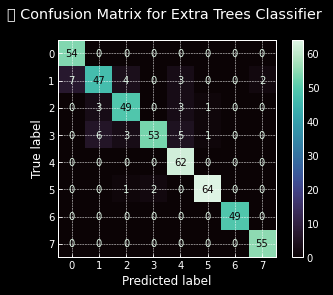

In [90]:
class_names = GPPD_df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)

# Saving the best Classification ML model

In [91]:
filename = "FinalModel_Classification_E04.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Classification_E04.pkl']

Finally I am saving my best classification model using the joblib library.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and regression label

In [92]:
X = GPPD_df.drop('capacity_mw', axis=1)
Y = GPPD_df['capacity_mw']

I have separated the dataset into features and regression label where X represents all the feature columns and Y represents the regression target label column

# Feature Scaling

In [93]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head() # Displaying all the features after applying scaling technique to avoid bias output

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.154079,-0.911736,1.175163,0.468797,1.580000,-1.060641
1,0.598056,-0.567417,-0.983247,0.618009,3.127148,0.400570
2,0.132345,-1.920402,1.606845,0.618009,-0.514600,0.400570
3,0.452429,3.205575,-0.551565,-0.053442,-0.490798,0.400570
4,0.141538,1.283666,-0.983247,0.767220,-0.490798,0.400570


I am using the Standard Scaler method to normalize my feature values and ensure that my regression model does not have any kind of biasness towards a particular column value.

# Finding the best random state for building Regression Models

In [94]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.538334072004571 on Random State 135


Great so with the help of random state selection process we have found our lucky number to be 135 amongst 1-1000

In [95]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=135)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [96]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1.2755006251261407
R2 Score is: 53.833407200457096
Cross Validation Score: 42.23177089747712
R2 Score - Cross Validation Score is 11.601636302979976


In [97]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)


RMSE Score is: 1.275499938378957
R2 Score is: 53.83345691390831
Cross Validation Score: 42.25804411938349
R2 Score - Cross Validation Score is 11.575412794524816


In [98]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 1.4028822860149066
R2 Score is: 44.15183151646706
Cross Validation Score: 37.52199723471622
R2 Score - Cross Validation Score is 6.6298342817508455


In [99]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 1.1644556142667224
R2 Score is: 61.52201239071937
Cross Validation Score: 47.63562285903838
R2 Score - Cross Validation Score is 13.88638953168099


In [100]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 1.6074216499271625
R2 Score is: 26.679385003570566
Cross Validation Score: 24.488084538594386
R2 Score - Cross Validation Score is 2.1913004649761803


In [101]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 1.2236786670609343
R2 Score is: 57.508579499764146
Cross Validation Score: 45.345378537402965
R2 Score - Cross Validation Score is 12.16320096236118


In [102]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 1.2291387362394373
R2 Score is: 57.128539038651446
Cross Validation Score: 45.57323299213486
R2 Score - Cross Validation Score is 11.555306046516584


In [103]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1.595140444075735
R2 Score is: 27.79548997355127
Cross Validation Score: 4.144374545037651
R2 Score - Cross Validation Score is 23.65111542851362


In [104]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 1.1131522779037217
R2 Score is: 64.83783310530653
Cross Validation Score: 55.637601015967334
R2 Score - Cross Validation Score is 9.200232089339195


In [105]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 1.0196659176197154
R2 Score is: 70.49590629602636
Cross Validation Score: 63.33261557936265
R2 Score - Cross Validation Score is 7.16329071666371


In [106]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

RMSE Score is: 1.007419897819593
R2 Score is: 71.20032935535696
Cross Validation Score: 58.83430991273036
R2 Score - Cross Validation Score is 12.366019442626595


# Hyper parameter tuning on the best Regression ML Model

In [107]:
# Choosing Extra Trees Regressor

fmod_param = {'criterion' : ['mse', 'mae'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }

After comparing all the regression models I have selected Extra Trees Regressor as my best regression model and have listed down it's parameters above referring the sklearn webpage. I chose Extra Trees Regressor model becuase I feel among all the other regression models it was able to give me a better R2 score and a decent cross validation score for the same

In [108]:
GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best regression model.

In [109]:
GSCV.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [110]:
GSCV.best_params_

{'criterion': 'mse',
 'min_samples_split': 3,
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': 42}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [111]:
Final_Model = ExtraTreesRegressor(criterion='mse', min_samples_split=3, n_estimators=100, n_jobs=-1, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 64.67988346483102


I have successfully incorporated the Hyper Parameter Tuning on my Final Regression Model and received the R2 score for it.

# Saving the best Regression ML model

In [112]:
filename = "FinalModel_Regression_E04.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Regression_E04.pkl']

Finally, I am saving my best regression model using the joblib library.